In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pltt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# pd.set_option('display.max_rows', None) # use this if only neccesary



In [2]:
# import dataset
ntoma_wura = pd.read_csv(r'D:\Data analysis\pandas_ demo\Ntoma.csv')


# 1. Understanding dataset
#### use these codes to view and know the data further


.head()
.info()
.shape
.describe()
.dtypes
.tails()
.columns

In [3]:
# showin gthe first 10 rows of data
ntoma_wura.head(10)

,ID,ORDER_ID,PRODUCT,QUANTITIES,PRICE PER PIECE,SALES,DATE,STATUS,CITY,REGION
0,1,10107,Original GTP,30,200,6000,2/24/2020,Shipped,Koforidua,Eastern Region
1,2,10121,Original GTP,34,200,6800,5/7/2020,Shipped,Koforidua,Eastern Region
2,3,10134,Original GTP,41,200,8200,7/1/2020,Shipped,Koforidua,Eastern Region
3,4,10145,Original GTP,45,200,9000,8/25/2020,Shipped,Koforidua,Eastern Region
4,5,10159,Original GTP,49,200,9800,10/10/2020,Shipped,Koforidua,Eastern Region
5,6,10168,Original GTP,36,200,7200,10/28/2020,Shipped,Koforidua,Eastern Region
6,7,10180,Original GTP,29,200,5800,11/11/2020,Shipped,Koforidua,Eastern Region
7,8,10188,Original GTP,48,200,9600,11/18/2020,Shipped,Koforidua,Eastern Region
8,9,10201,Original GTP,22,200,4400,12/1/2020,Shipped,Koforidua,Eastern Region
9,10,10211,Original GTP,41,200,8200,1/15/2021,Shipped,Koforidua,Eastern Region


In [4]:
# fnding informanton about the dataframe
ntoma_wura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2823 non-null   int64 
 1   ORDER_ID         2823 non-null   int64 
 2   PRODUCT          2823 non-null   object
 3   QUANTITIES       2823 non-null   int64 
 4   PRICE PER PIECE  2823 non-null   int64 
 5   SALES            2823 non-null   int64 
 6   DATE             2823 non-null   object
 7   STATUS           2823 non-null   object
 8   CITY             2823 non-null   object
 9   REGION           2823 non-null   object
dtypes: int64(5), object(5)
memory usage: 220.7+ KB


In [5]:
# showing the number of rows and columns
ntoma_wura.shape

(2823, 10)

In [6]:
# works on the numeric columns
ntoma_wura.describe()

,ID,ORDER_ID,QUANTITIES,PRICE PER PIECE,SALES
count,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000
mean,1412.00000,10258.725115,35.092809,478.820404,16680.974141
std,815.07423,92.085478,9.741443,534.401038,19780.991893
min,1.00000,10100.000000,6.000000,100.000000,1100.000000
25%,706.50000,10180.000000,27.000000,150.000000,4800.000000
50%,1412.00000,10262.000000,35.000000,200.000000,7200.000000
75%,2117.50000,10333.500000,43.000000,350.000000,14625.000000
max,2823.00000,10425.000000,97.000000,1500.000000,114000.000000


In [7]:
# showing the data types of the dataframe
ntoma_wura.dtypes

ID                  int64
ORDER_ID            int64
PRODUCT            object
QUANTITIES          int64
PRICE PER PIECE     int64
SALES               int64
DATE               object
STATUS             object
CITY               object
REGION             object
dtype: object

In [8]:
# checking the various coloums available
ntoma_wura.columns

Index(['ID', 'ORDER_ID', 'PRODUCT', 'QUANTITIES', 'PRICE PER PIECE', 'SALES',
       'DATE', 'STATUS', 'CITY', 'REGION'],
      dtype='object')

# 2. Data preparation and cleaning


Renaming columns -- ORDER_ID to SALES_ID
Converting datatypes
Dropping irrelevant columns -- not applicable in this analysis

Identifying duplicated columns -- SALES id

Creating new columns -- not aplicable in this analysis

Feature creation

Addressing missing data


#### Renaming columns

In [9]:

ntoma_wura.columns = ntoma_wura.columns.str.replace('ORDER_ID', 'SALES_ID')
ntoma_wura.columns = ntoma_wura.columns.str.replace('QUANTITIES', 'QTY')
ntoma_wura.columns = ntoma_wura.columns.str.replace('REGION', 'REG')


In [10]:
ntoma_wura.head()

,ID,SALES_ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,STATUS,CITY,REG
0,1,10107,Original GTP,30,200,6000,2/24/2020,Shipped,Koforidua,Eastern Region
1,2,10121,Original GTP,34,200,6800,5/7/2020,Shipped,Koforidua,Eastern Region
2,3,10134,Original GTP,41,200,8200,7/1/2020,Shipped,Koforidua,Eastern Region
3,4,10145,Original GTP,45,200,9000,8/25/2020,Shipped,Koforidua,Eastern Region
4,5,10159,Original GTP,49,200,9800,10/10/2020,Shipped,Koforidua,Eastern Region


#### Converting datatypes

In [11]:

ntoma_wura['DATE']=pd.to_datetime(ntoma_wura['DATE']) # date to date time

ntoma_wura['REG'] = ntoma_wura['REG'].astype('str') # date to date time

ntoma_wura['QTY'] = ntoma_wura['QTY'].astype('int64') # date to date time



In [12]:
ntoma_wura.dtypes

ID                          int64
SALES_ID                    int64
PRODUCT                    object
QTY                         int64
PRICE PER PIECE             int64
SALES                       int64
DATE               datetime64[ns]
STATUS                     object
CITY                       object
REG                        object
dtype: object

#### Using subset method to drop columns


In [13]:

#1. ntoma_wura.columns -- run this to print all th columns.
#2. copy the columns that will be printed
#3. create a LIST with it
#4. place # infront of the columns you want to remove and add .copy() at the end
#4. assing the dataframe name to the new list created


ntoma_wura=ntoma_wura[['ID', 'PRODUCT', 'QTY', 'PRICE PER PIECE', 'SALES', 'DATE',
       #'STATUS', 'SALES_ID', 
                       'CITY','REG']].copy()

# STATUS AND SALES_ID  are Dropped

In [14]:
ntoma_wura.head()

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG
0,1,Original GTP,30,200,6000,2020-02-24,Koforidua,Eastern Region
1,2,Original GTP,34,200,6800,2020-05-07,Koforidua,Eastern Region
2,3,Original GTP,41,200,8200,2020-07-01,Koforidua,Eastern Region
3,4,Original GTP,45,200,9000,2020-08-25,Koforidua,Eastern Region
4,5,Original GTP,49,200,9800,2020-10-10,Koforidua,Eastern Region


#### create new columns : MONTH  and  YEAR

In [15]:

# first convert DATE to string

ntoma_wura['DATE'] = ntoma_wura['DATE'].astype('str')
# create month column from existing date column

ntoma_wura['MONTH'] = ntoma_wura['DATE'].str[5:7]
ntoma_wura['MONTH'] = ntoma_wura['MONTH'].astype('int64')

In [16]:
# convert month number to month name

ntoma_wura['MONTH'] = pd.to_datetime(
    ntoma_wura['MONTH'], format='%m').dt.month_name()
ntoma_wura.head()

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH
0,1,Original GTP,30,200,6000,2020-02-24,Koforidua,Eastern Region,February
1,2,Original GTP,34,200,6800,2020-05-07,Koforidua,Eastern Region,May
2,3,Original GTP,41,200,8200,2020-07-01,Koforidua,Eastern Region,July
3,4,Original GTP,45,200,9000,2020-08-25,Koforidua,Eastern Region,August
4,5,Original GTP,49,200,9800,2020-10-10,Koforidua,Eastern Region,October


In [17]:
# create year column from existing date column

ntoma_wura['YEAR'] = ntoma_wura['DATE'].str[0:4]
ntoma_wura['YEAR']= ntoma_wura['YEAR'].astype('int64')
ntoma_wura.head()

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH,YEAR
0,1,Original GTP,30,200,6000,2020-02-24,Koforidua,Eastern Region,February,2020
1,2,Original GTP,34,200,6800,2020-05-07,Koforidua,Eastern Region,May,2020
2,3,Original GTP,41,200,8200,2020-07-01,Koforidua,Eastern Region,July,2020
3,4,Original GTP,45,200,9000,2020-08-25,Koforidua,Eastern Region,August,2020
4,5,Original GTP,49,200,9800,2020-10-10,Koforidua,Eastern Region,October,2020


#### Convert the date column datatype back  to datetime

In [18]:
# use same method to other different data types
# eg. TO NUMERIC
#ntoma_wura['col_name']=pd.to_numeric(ntoma_wura['col_name'])

ntoma_wura['DATE']=pd.to_datetime(ntoma_wura['DATE'])

ntoma_wura.dtypes

ID                          int64
PRODUCT                    object
QTY                         int64
PRICE PER PIECE             int64
SALES                       int64
DATE               datetime64[ns]
CITY                       object
REG                        object
MONTH                      object
YEAR                        int64
dtype: object

#### Findng missing values

In [19]:
# method 1
ntoma_wura.isna().sum()

#there are no missing data

ID                 0
PRODUCT            0
QTY                0
PRICE PER PIECE    0
SALES              0
DATE               0
CITY               0
REG                0
MONTH              0
YEAR               0
dtype: int64

In [20]:
# meshod 2
# checking to see if there is missing data
for col in ntoma_wura.columns:
    missing_data_pct=np.mean(ntoma_wura[col].isnull())
    print('{} - {}%'.format(col,missing_data_pct) )


ID - 0.0%
PRODUCT - 0.0%
QTY - 0.0%
PRICE PER PIECE - 0.0%
SALES - 0.0%
DATE - 0.0%
CITY - 0.0%
REG - 0.0%
MONTH - 0.0%
YEAR - 0.0%


There are no missing data to deal with

#### Finding the duplicated data

In [21]:
# Method
ntoma_wura.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [22]:
# Method 2
ntoma_wura.loc[ntoma_wura.duplicated()]

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH,YEAR


In [23]:
# sub-setting
ntoma_wura.duplicated(subset=['ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [24]:
# no duplicates were found in the id columns
ntoma_wura.loc[ntoma_wura.duplicated(subset=['ID'])]

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH,YEAR


In [25]:
# investigating the selected columns for duplications
ntoma_wura.loc[ntoma_wura.duplicated(subset=[ 'PRODUCT', 'QTY', 'PRICE PER PIECE', 'SALES', 'DATE',
                                             'CITY','REG']).reset_index(drop=True)]



,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH,YEAR
192,193,GTP Nustyle,33,150,4950,2020-11-06,Koforidua,Eastern Region,November,2020
261,262,Original GTP,22,200,4400,2022-01-05,Koforidua,Eastern Region,January,2022
264,265,Original GTP,66,200,13200,2022-04-08,Koforidua,Eastern Region,April,2022
268,269,GTP Nustyle,46,150,6900,2020-06-03,Koforidua,Eastern Region,June,2020
269,270,GTP Nustyle,33,150,4950,2020-08-08,Koforidua,Eastern Region,August,2020
363,364,GTP Nustyle,34,150,5100,2022-01-06,Goaso,Ahafo Region,January,2022
463,464,GTP Nustyle,41,150,6150,2021-08-30,Goaso,Ahafo Region,August,2021
517,518,Kente pa,37,1500,55500,2021-10-11,Goaso,Ahafo Region,October,2021
547,548,GTP Nustyle,36,150,5400,2021-11-24,Goaso,Ahafo Region,November,2021
602,603,GTP Nustyle,48,150,7200,2020-07-02,Goaso,Ahafo Region,July,2020


These dupicates were found to be needed as per the way the data was collected. 
Cross column checkings also showed that the rows are not duplicated however, as there were differences in the entire row data

# Descriptive Analysis

 - Descriptive stats
 - univirate, bivirate and multivirate analysis
 - Histogram, KDE, bar graph, pairplot, scatterpolot


## A.  Transactional amount Frequencies (sales amount counts)

1. Over all 
2. By  Year
3. By  Month
4. By  Productt
5. By  City
6. By  Region
 

##### (i). Unique Transactional Figures and how many times they occured

In [26]:
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_rows', None) or this to display all records.

In [27]:
# count of transactional figure amounts  
unique_amount=ntoma_wura['SALES'].value_counts()

# Top 5 sales amounts
unique_amount.head()

SALES
7200    54
6600    53
5400    51
4800    50
6300    48
Name: count, dtype: int64

These are the amount that occured frequently in sales. this means that majoriy of the customers were comfortable to spend between 4800 to 7200 on products they buy.

In [28]:
# Calculate the total counts of sales figure per city

city_unique_amount = ntoma_wura.groupby(['CITY'])[['SALES']].value_counts()

city_unique_amount.head()

CITY   SALES
Aflao  5400     6
       6750     6
       6600     6
       30000    5
       6000     5
Name: count, dtype: int64

This analysis shwows the specific amounts and frequencies each city spent on the products.  

##### (iii). Unique Transactional sales figures  and their frequencies per Region

In [29]:
# Calculate the total counts of sales figure per region

region_unique_amount = ntoma_wura.groupby(['REG'])[['SALES']].value_counts()

region_unique_amount.head()

REG           SALES
Ahafo Region  3600     14
              5400     13
              5100     12
              3000     11
              4350     11
Name: count, dtype: int64

This analysis shwows the specific amounts and frequencies each region spent on the products. 

##### (v). Unique Transactional figures and their frequencies per month

In [30]:
# Calculate the total counts of unique sales figure per month

month_unique_amount = ntoma_wura.groupby(['MONTH'])[['SALES']].value_counts()

month_unique_amount.head() 

MONTH  SALES
April  7200     8
       7050     5
       11400    4
       9000     4
       6900     4
Name: count, dtype: int64

This analysis shwows the specific amounts and frequencies spent on  products each month.

##### (vi). Unique Transactional figures and their frequencies per Year

In [31]:
# Calculate the total counts of unique sales figure per year

year_unique_amount = ntoma_wura.groupby(['YEAR'])[['SALES']].value_counts()

year_unique_amount.head() 

YEAR  SALES
2020  6300     25
      6600     20
      3450     19
      5400     18
      3000     18
Name: count, dtype: int64

This analysis shwows the specific amounts and frequencies spent on  products each year.

## B. Sales 

## Total sales (sum), Count,  Average (mean), Lowest (min), Highest (max)

1. Over all 
2. By  Year
3. By  Month
4. By  Productt
5. By  City
6. By  Region
 

### 1. Over all sales analysis.

In [32]:
# Overall Sales Total
total_sales=ntoma_wura['SALES'].sum()
total_sales

47090390

The total sales is 47,090,390

##### Sales Description

In [33]:
# Overall Sales Total
total_sales_description=ntoma_wura['SALES'].describe()
total_sales_description

count      2823.000000
mean      16680.974141
std       19780.991893
min        1100.000000
25%        4800.000000
50%        7200.000000
75%       14625.000000
max      114000.000000
Name: SALES, dtype: float64

1. The number of sales made was 2,823.
2. The average sales was 16,681.
3. The highest sales amount is 114,000.
4. The lowest amount of sales is 1,100.

### 2. Sales analysis on Year

In [34]:
# Top Yearly total sales
yearly_total_sales = ntoma_wura.groupby(['YEAR'])[['SALES']].sum().sort_values(['SALES'], inplace = False, ascending =False)
yearly_total_sales

,SALES
YEAR,
2021,22322530
2020,16561370
2022,8206490


2021 recorded the highest Total sales whiles 2022 recorded the lowest Total sales. This means sales is underperforming.

In [35]:
# Yearly sales Description

yearly_sales_description = ntoma_wura.groupby(['YEAR'])[['SALES']].describe()
yearly_sales_description

SALES                                                               \
       count          mean           std     min     25%     50%      75%   
YEAR                                                                        
2020  1000.0  16561.370000  19564.443649  2100.0  4650.0  7000.0  14700.0   
2021  1345.0  16596.676580  19638.036314  2000.0  4800.0  7350.0  14400.0   
2022   478.0  17168.389121  20648.535872  1100.0  5100.0  8125.0  14925.0   

                
           max  
YEAR            
2020   75000.0  
2021   82500.0  
2022  114000.0

2020 had the highest sales activity however recorded the lowest sales amount as well as average figure.
2022 had the lowest sales actvities however recorded the highes sales amount and high average figure.

### 3. Sales analysis on Month

In [36]:
# Top Monthly total sales
monthly_total_sales = ntoma_wura.groupby(['MONTH'])[['SALES']].sum().sort_values(['SALES'], inplace = False, ascending =False)
monthly_total_sales

,SALES
MONTH,
November,9881620
October,5442030
January,4435720
March,4042150
May,4015210
February,3436960
April,3082350
December,2940640
September,2891120


Sales peakes in November whiles its performance reduced in July.

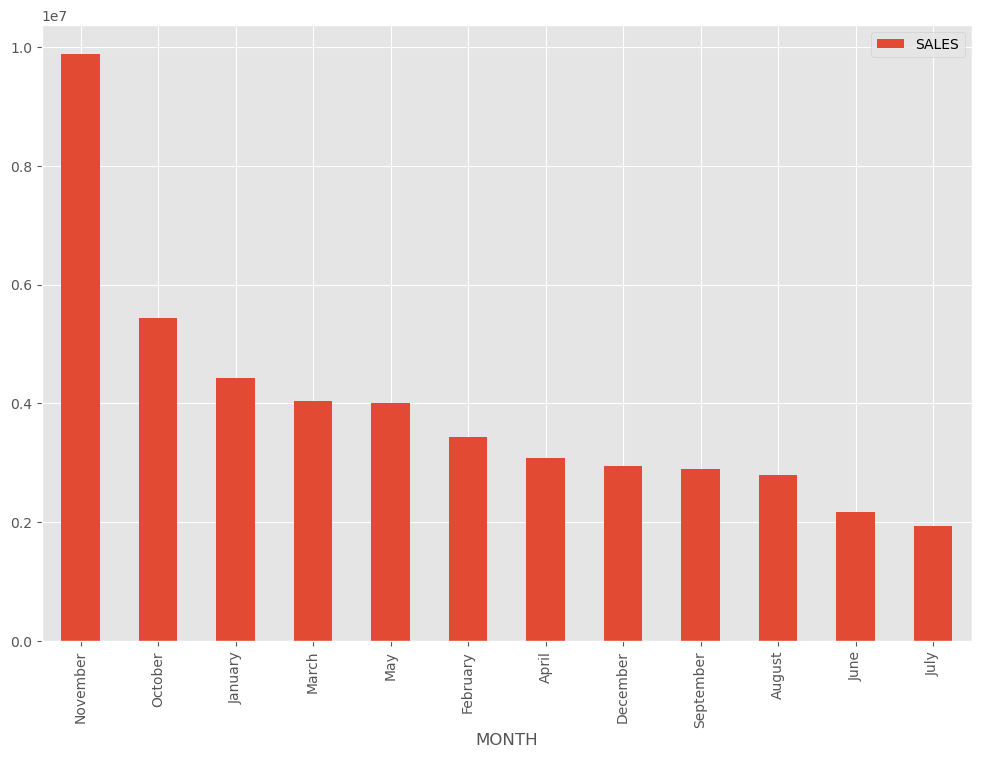

In [37]:
monthly_total_sales.plot.bar()
plt.show()

Sales peakes in November whiles its performance reduced in July.

In [38]:
# Monthly sales description
month_sales_description = ntoma_wura.groupby(['MONTH'])[['SALES']].describe()
month_sales_description

SALES                                                               \
           count          mean           std     min     25%     50%      75%   
MONTH                                                                           
April      178.0  17316.573034  21310.870758  1950.0  6000.0  8400.0  13900.0   
August     191.0  14657.329843  17798.627939  2100.0  5100.0  7200.0  12750.0   
December   180.0  16336.888889  19178.749014  2000.0  4800.0  7050.0  14475.0   
February   224.0  15343.571429  18655.444912  2000.0  5100.0  7500.0  13387.5   
January    229.0  19369.956332  22008.513534  2000.0  4950.0  7500.0  31500.0   
July       141.0  13792.695035  17930.453180  2100.0  4400.0  6450.0  12000.0   
June       131.0  16628.015267  19842.805727  2000.0  4650.0  8000.0  14700.0   
March      212.0  19066.745283  19927.268922  2300.0  5550.0  9000.0  33375.0   
May        252.0  15933.373016  20248.873584  1100.0  4687.5  6900.0  13200.0   
November   597.0  16552.127303  19589.507747  2000.0  4800.0  7050.0  14700.0   
October    317.0  17167.287066  19977.470971  2200.0  4600.0  7200.0  15000.0   
September  171.0  16907.134503  19774.283908  2100.0  4500.0  6900.0  17500.0   

                     
                max  
MONTH                
April      114000.0  
August      75000.0  
December    75000.0  
February    75000.0  
January     75000.0  
July        75000.0  
June        75000.0  
March       75000.0  
May         99000.0  
November    82500.0  
October     72000.0  
September   75000.0

November had the highest level of sales activities. June had the lowest activities. 

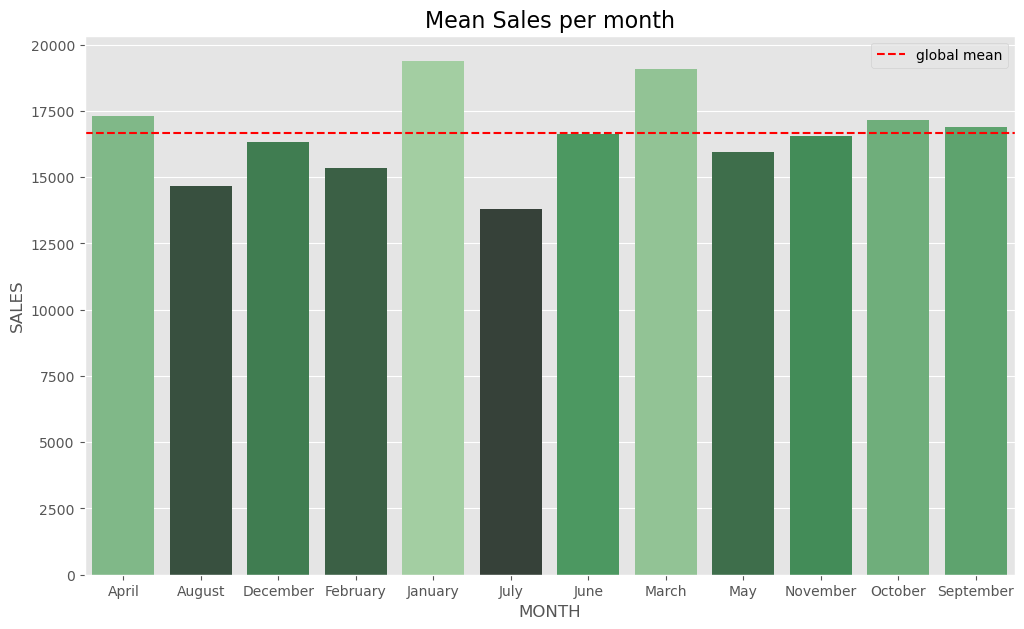

In [39]:

# Calculate the average sales per month

month_average_sales = ntoma_wura.groupby(['MONTH'])[['SALES']].mean()

month_average_sales  
    
    
# deploy the average regional crashes on a bar graph
    
data = month_average_sales
pal = sns.color_palette("Greens_d", len(data))
rank = data['SALES'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
y=data['SALES'],
palette=np.array(pal[::-1])[rank])
ax.axhline(ntoma_wura['SALES'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean Sales per month', fontsize=16)

plt.show()

### 4. Sales analysis on Product

##### Total products sales

In [40]:
# Top Products total sales
product_total_sales = ntoma_wura.groupby(['PRODUCT'])[['SALES']].sum().sort_values(['SALES'], inplace = False, ascending =False)

product_total_sales

,SALES
PRODUCT,
Kente pa,31344900
GTP Nustyle,5348400
GTP Adepa,3218100
Holland,2844450
Original GTP,2423800
Hitarget,1097140
ATL,813600


Kentepa was the highest performer interms of sales.

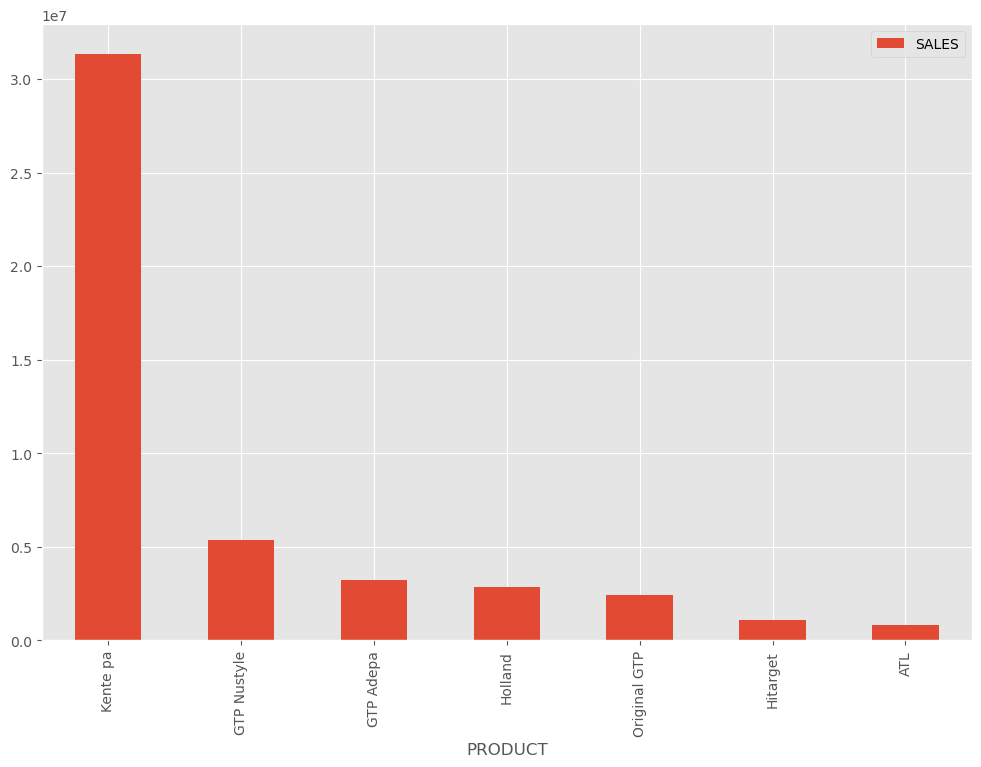

In [41]:
product_total_sales.plot.bar()
plt.show()

#####  Products sales description

In [42]:
# Products sales description
product_sales_description = ntoma_wura.groupby(['PRODUCT'])[['SALES']].describe()
product_sales_description

SALES                                                        \
              count          mean           std     min      25%      50%   
PRODUCT                                                                     
ATL            77.0  10566.233766   2825.849215  6000.0   8100.0  10500.0   
GTP Adepa     306.0  10516.666667   3012.174749  3300.0   8100.0  10200.0   
GTP Nustyle   967.0   5530.920372   2277.714175  1500.0   4050.0   5250.0   
Hitarget      301.0   3644.983389    985.061969  1100.0   2800.0   3600.0   
Holland       234.0  12155.769231   2975.158027  7000.0  10150.0  12075.0   
Kente pa      607.0  51639.044481  14664.174967  9000.0  39000.0  51000.0   
Original GTP  331.0   7322.658610   2275.095776  4000.0   5600.0   7200.0   

                                 
                  75%       max  
PRODUCT                          
ATL           13200.0   15300.0  
GTP Adepa     12900.0   25500.0  
GTP Nustyle    6600.0   22050.0  
Hitarget       4500.0    7000.0  
Holland       14350.0   19250.0  
Kente pa      63000.0  114000.0  
Original GTP   8800.0   15000.0

- GTP Nustyle was the highest product sold.
- High target recorded the least sold amount.
- ATL was the least purchased sold.


Text(0, 0.5, 'number of pieces sold')

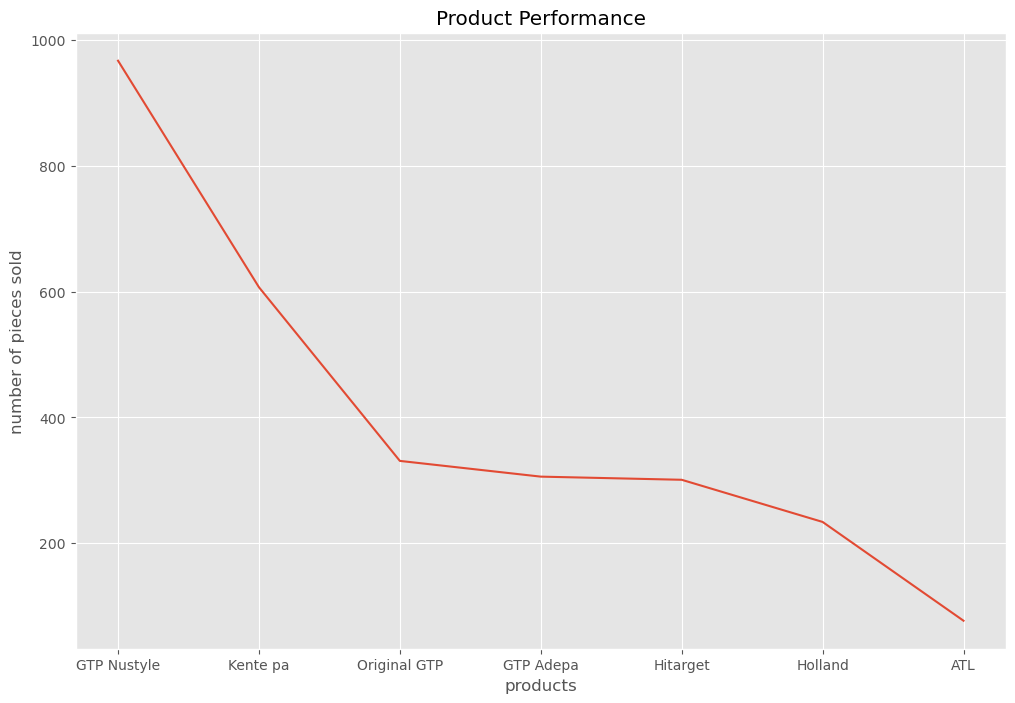

In [43]:
# ploting on an a line graph for products


axis=ntoma_wura['PRODUCT'].value_counts().plot(title ='Product Performance')
axis.set_xlabel('products')
axis.set_ylabel('number of pieces sold')

##### Number Product sold plot

Text(0, 0.5, 'Number of sales')

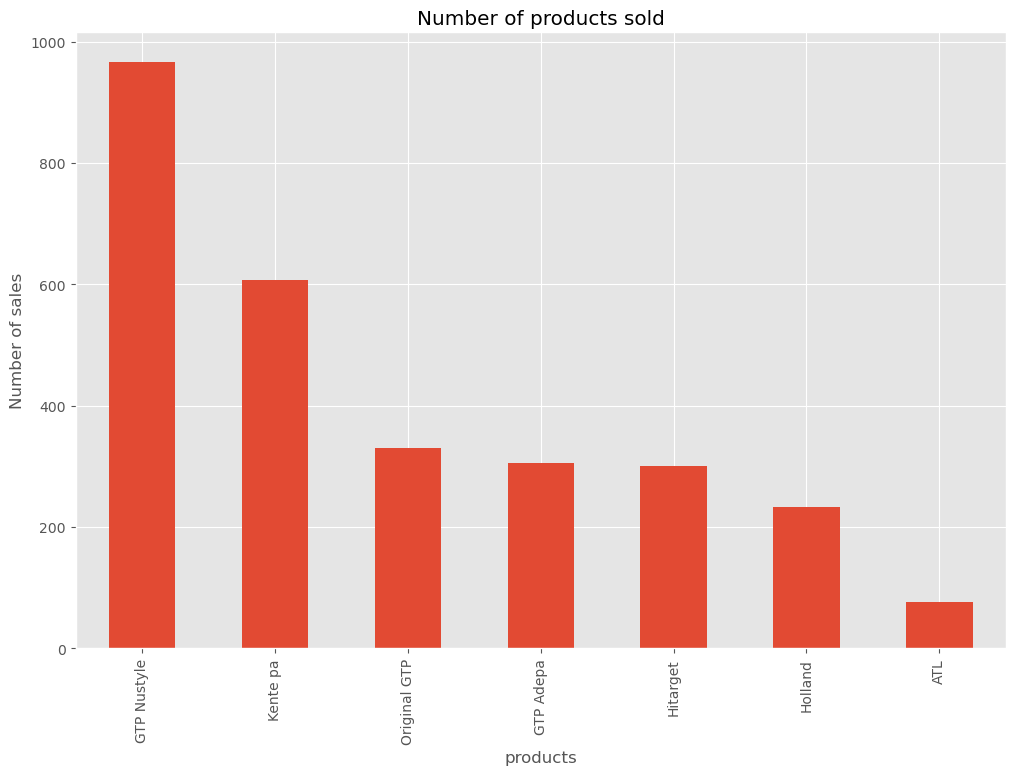

In [44]:
# number and kind of products sold
product_count=ntoma_wura['PRODUCT'].value_counts()
product_count

# plot on bar graph
product_count.plot.bar( title = 'Number of products sold')
plt.xlabel('products')
plt.ylabel('Number of sales')

##### Average sales per product graph

Text(0.5, 1.0, 'Mean Sales per product')

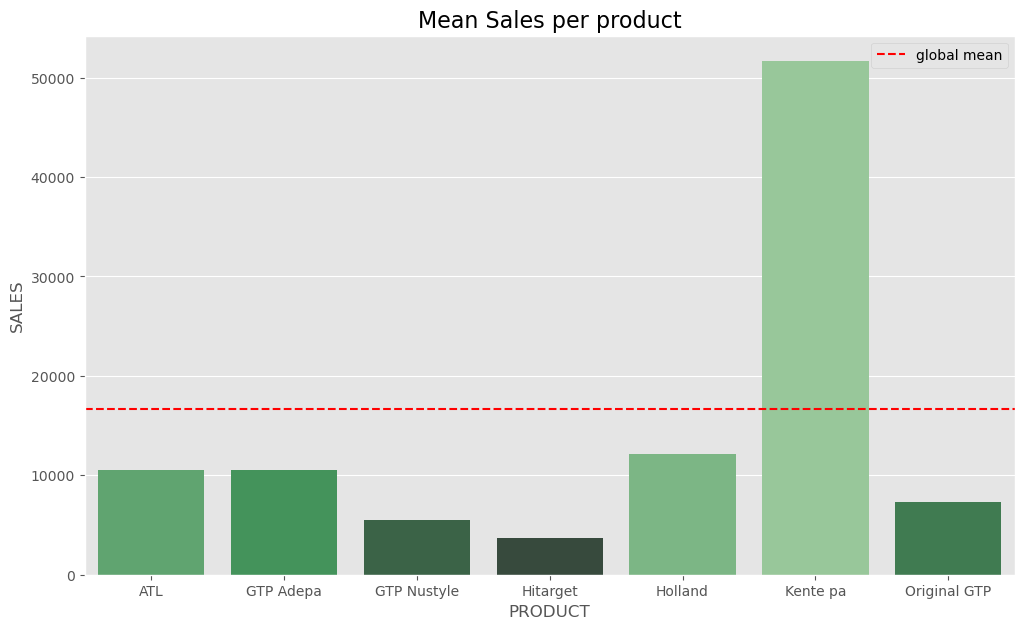

In [45]:

# Calculate the average sales per product

product_average_sales = ntoma_wura.groupby(['PRODUCT'])[['SALES']].mean()

product_average_sales  
    
    
    
# deploy the average regional crashes on a bar graph
    
data = product_average_sales
pal = sns.color_palette("Greens_d", len(data))
rank = data['SALES'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
y=data['SALES'],
palette=np.array(pal[::-1])[rank])
ax.axhline(ntoma_wura['SALES'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean Sales per product', fontsize=16)

Kente pa had the highest average figure.

### Sales analysis on City

In [46]:
# Top City total sales
city_total_sales = ntoma_wura.groupby(['CITY'])[['SALES']].sum().sort_values(['SALES'], inplace = False, ascending =False)

city_total_sales

,SALES
CITY,
Makola,11710900
Ejisu,9909500
Tamale,6372650
Goaso,5736100
Asikuma,4301750
Ho,2637250
Cape Coast,2536750
Aflao,2238350
Koforidua,1647140


Makola performed well amongst all the cities with 11,710,900. koforidua didn't perform well.

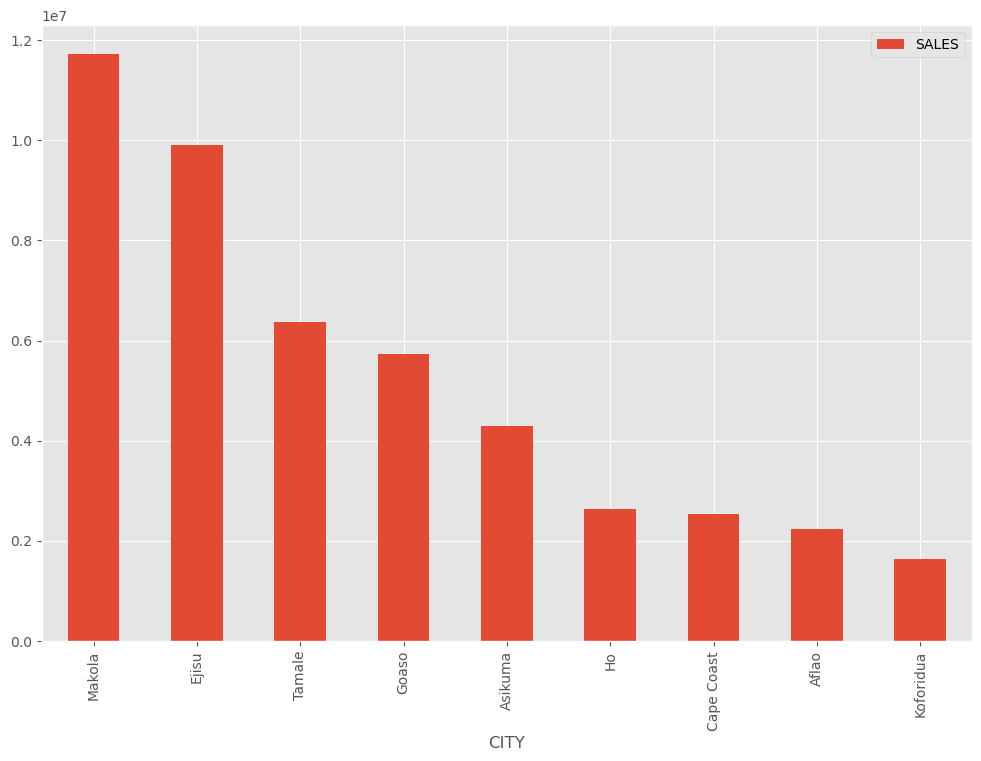

In [47]:
city_total_sales.plot.bar()
plt.show()

##### City data description

In [48]:
# City sales description
city_sales_description = ntoma_wura.groupby(['CITY'])[['SALES']].describe()
city_sales_description

SALES                                                       \
            count          mean           std     min     25%      50%   
CITY                                                                     
Aflao       173.0  12938.439306  16868.750674  3000.0  5000.0   6750.0   
Asikuma     156.0  27575.320513  26041.173043  2100.0  4500.0   7350.0   
Cape Coast  233.0  10887.339056   3467.294950  3000.0  8100.0  10850.0   
Ejisu       509.0  19468.565815  21827.310651  1950.0  4950.0   7200.0   
Goaso       384.0  14937.760417  20538.387130  1500.0  4100.0   5700.0   
Ho          127.0  20765.748031  24527.027286  3150.0  5150.0   6900.0   
Koforidua   282.0   5840.921986   2031.657774  1800.0  4400.0   5400.0   
Makola      462.0  25348.268398  23134.024468  1900.0  5625.0  12600.0   
Tamale      497.0  12822.233400  14814.789487  1100.0  4800.0   8400.0   

                               
                75%       max  
CITY                           
Aflao        9600.0   91500.0  
Asikuma     52500.0   99000.0  
Cape Coast  13200.0   23100.0  
Ejisu       33000.0   90000.0  
Goaso        9150.0  114000.0  
Ho          35250.0   87000.0  
Koforidua    7050.0   13200.0  
Makola      45000.0   75000.0  
Tamale      12950.0   84000.0

- Ejisu had the highest sales activities. Ho had the lowest sales activities.
- The highest sales amount was recorded in Goaso with 114,000. Tamale recorded the lowest sales amount with 1,100.
- On the average, Asikuma performed better than the rest of the cities with a sales figure of 27575.32.

##### Average sales per city

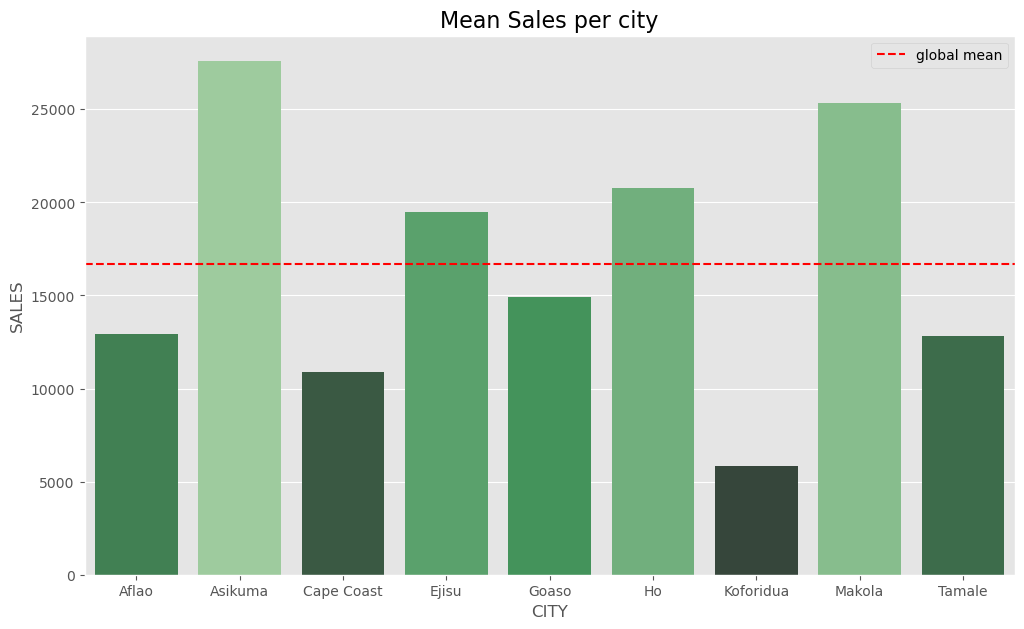

In [49]:

# Calculate the average sales per city

city_average_sales = ntoma_wura.groupby(['CITY'])[['SALES']].mean()

city_average_sales  
    
    
# deploy the average regional crashes on a bar graph
    
data = city_average_sales
pal = sns.color_palette("Greens_d", len(data))
rank = data['SALES'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
y=data['SALES'],
palette=np.array(pal[::-1])[rank])
ax.axhline(ntoma_wura['SALES'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean Sales per city', fontsize=16);

## C. Correlation and relationship

### Quantity vs  sales

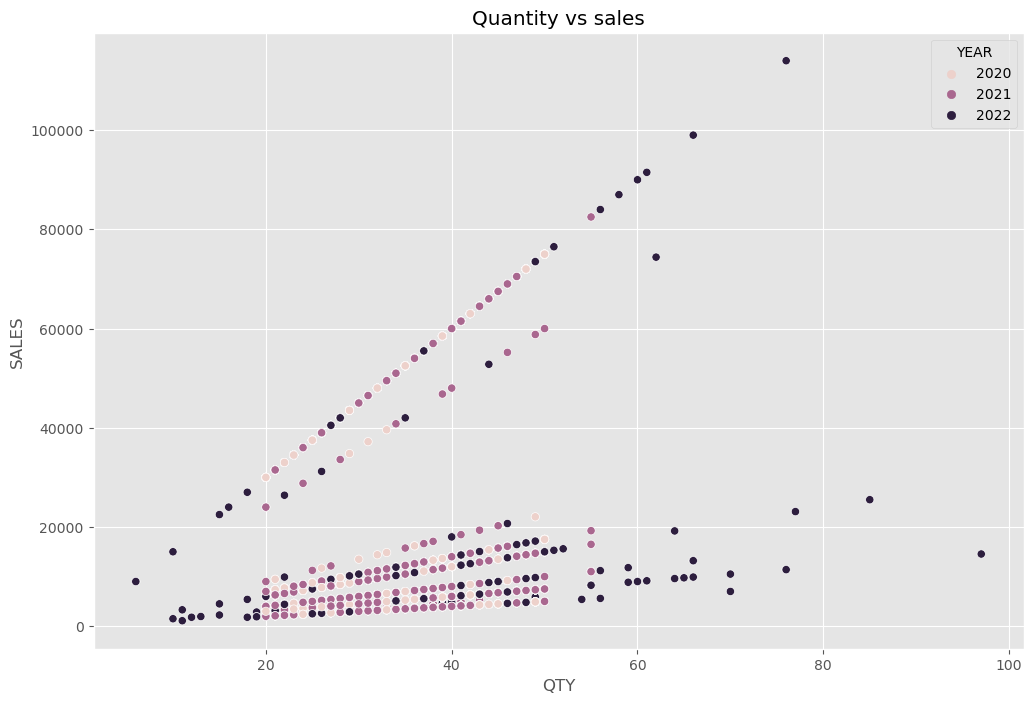

In [50]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='QTY',
               y='SALES',
               hue= 'YEAR',
               data= ntoma_wura )
ax.set_title('Quantity vs sales') 
plt.show()

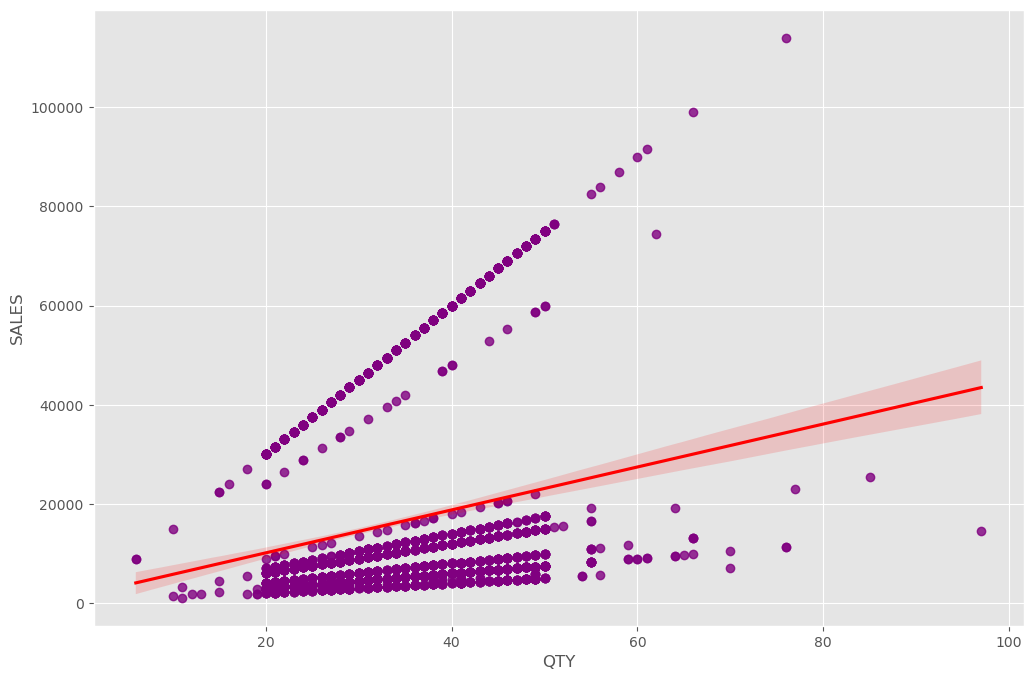

In [51]:
# regression plot
sns.regplot(x='QTY',y='SALES', data=ntoma_wura, scatter_kws = {"color": "purple"}, line_kws = {"color":"red"})
plt.show()

- Majority of the quantity of products sold was between 20 to 55
- The more the quatity sold the higher the total sales.
- There is a corelation between total sales and the quantity purchased.


###  Quantity and price per piece

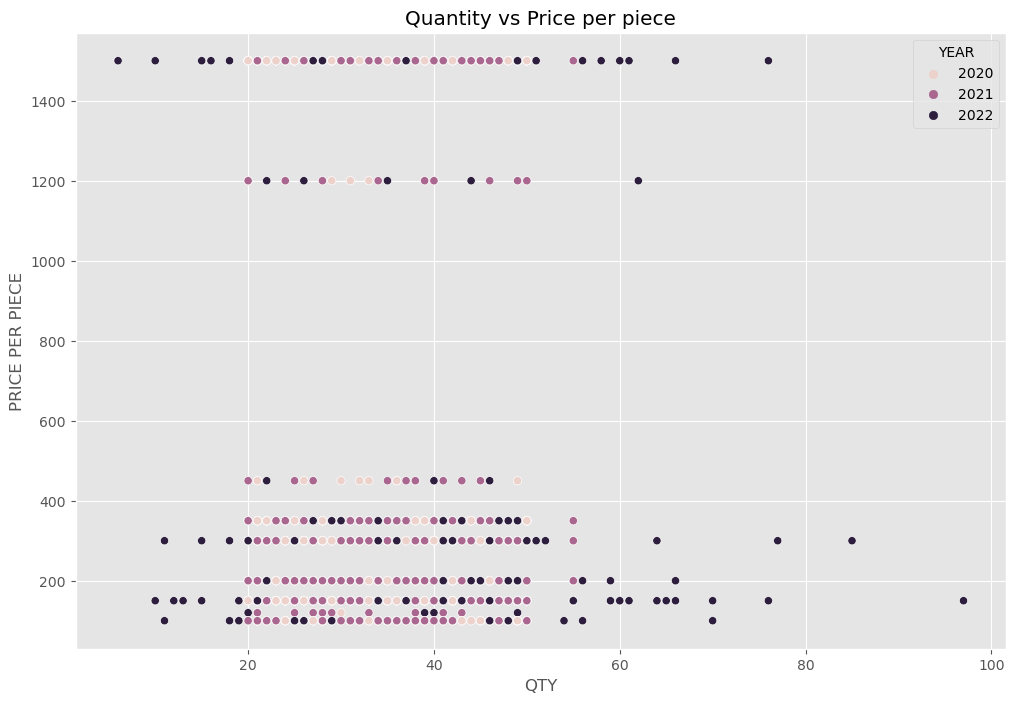

In [52]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='QTY',
               y='PRICE PER PIECE',
               hue= 'YEAR',
               data= ntoma_wura )
ax.set_title('Quantity vs Price per piece') 
plt.show()

- most of the product sold were below 600, and the number of products sold were between 20 to 50 .

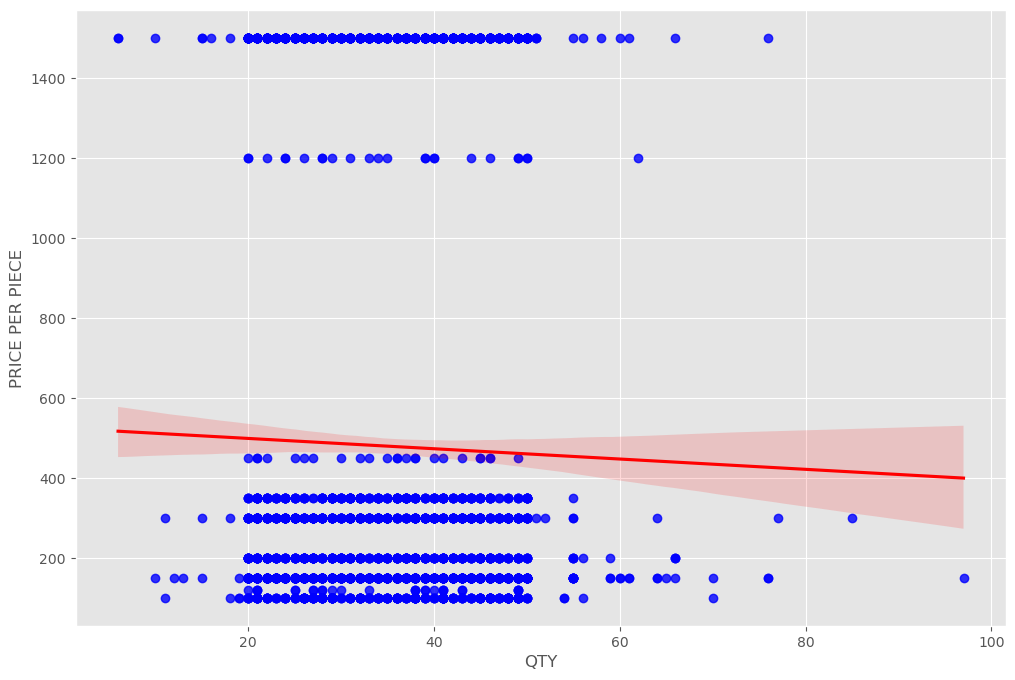

In [53]:
# regression plot
sns.regplot(x='QTY',y='PRICE PER PIECE', data=ntoma_wura, scatter_kws = {"color": "blue"}, line_kws = {"color":"red"})
plt.show()

### Price per piece vrs Sales

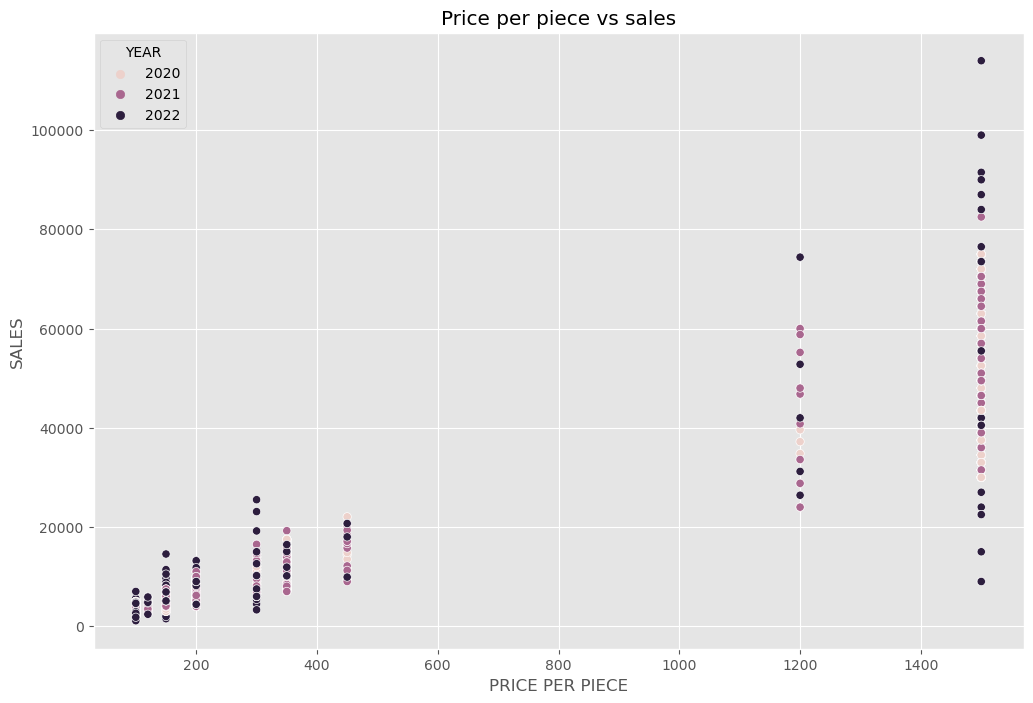

In [54]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='PRICE PER PIECE',
               y='SALES',
               hue= 'YEAR',
               data= ntoma_wura )
ax.set_title('Price per piece vs sales') 
plt.show()

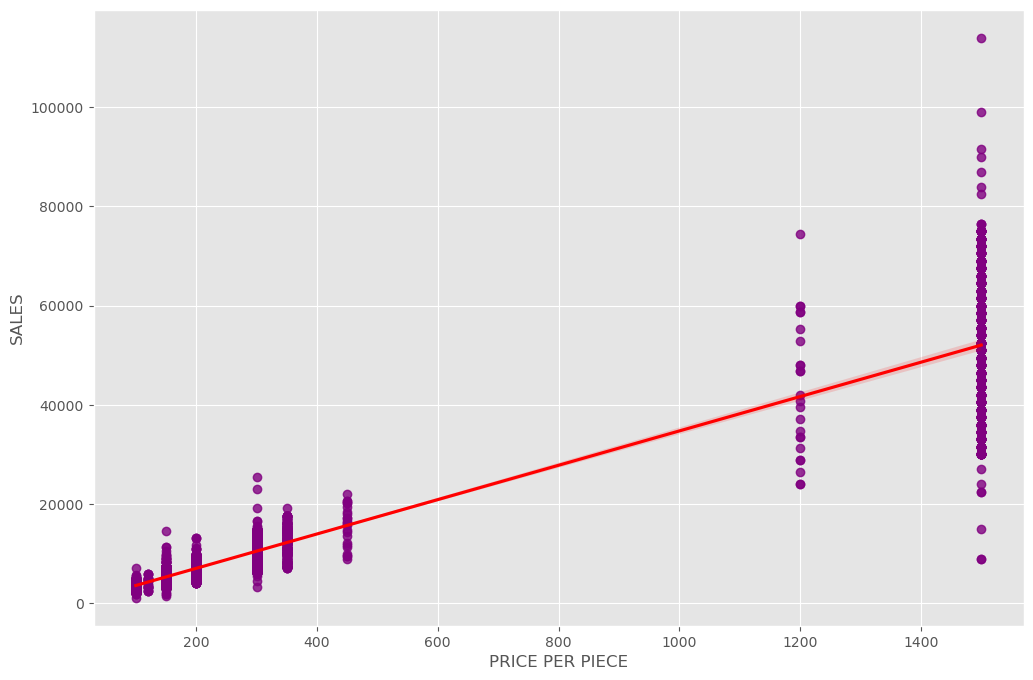

In [55]:
# regression plot
sns.regplot(x='PRICE PER PIECE',y='SALES', data=ntoma_wura, scatter_kws = {"color": "purple"}, line_kws = {"color":"red"})
plt.show()

##### Pairplot to compare more than two variables  QTY, PRICE PER PIECE, SALES
           

C:\Users\nem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


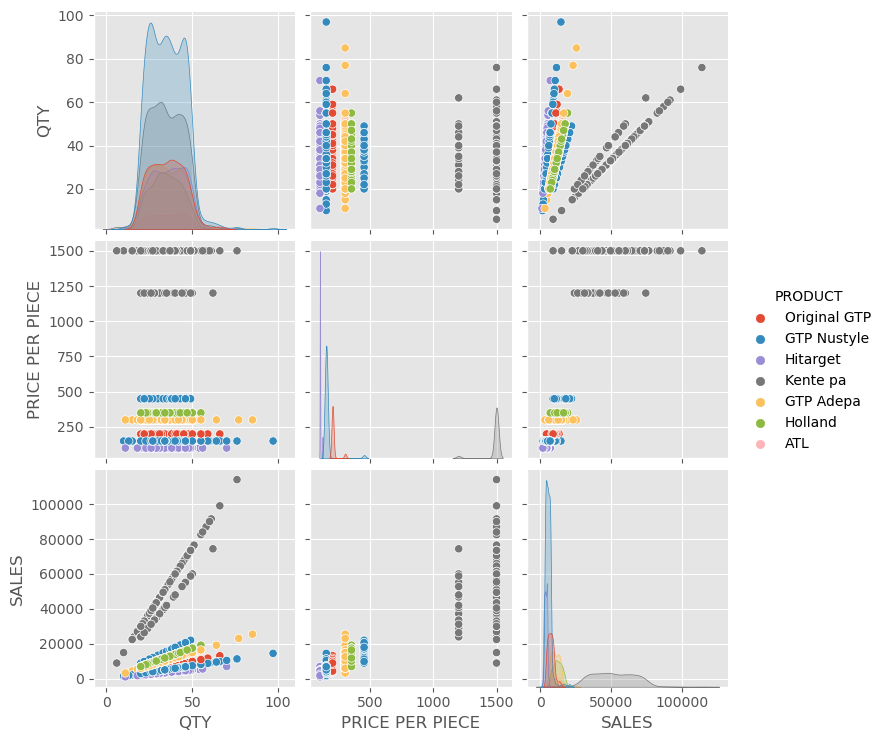

In [56]:
# more than two variables

sns.pairplot(ntoma_wura,
            vars=['QTY', 'PRICE PER PIECE', 'SALES'],
            hue = 'PRODUCT')
plt.show()


C:\Users\nem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


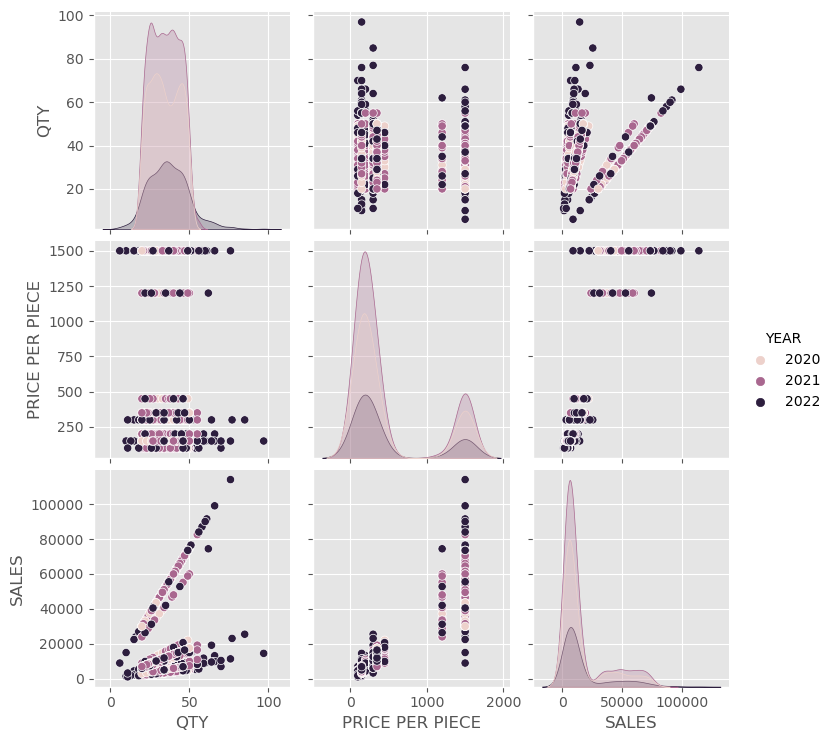

In [57]:
# more than two variables

sns.pairplot(ntoma_wura,
            vars=['QTY', 'PRICE PER PIECE', 'SALES'],
            hue = 'YEAR')
plt.show()


There is a correlation  between sales and quantity and regression model can be bulit on it.

## Correlations metrics

In [59]:

# correlation of numeric columns

ntoma_wura_correlation= ntoma_wura[['ID','QTY', 'PRICE PER PIECE', 'SALES', 'YEAR']].dropna().corr()
ntoma_wura_correlation
    

,ID,QTY,PRICE PER PIECE,SALES,YEAR
ID,1.000000,-0.004596,-0.004159,-0.001558,0.032712
QTY,-0.004596,1.000000,-0.023478,0.213128,0.069535
PRICE PER PIECE,-0.004159,-0.023478,1.000000,0.935360,-0.005550
SALES,-0.001558,0.213128,0.935360,1.000000,0.009028
YEAR,0.032712,0.069535,-0.005550,0.009028,1.000000


In [60]:
# unstacking correlation to make it  easier to see the pairings well
correlation_pairs = ntoma_wura_correlation.unstack()
correlation_pairs

ID               ID                 1.000000
                 QTY               -0.004596
                 PRICE PER PIECE   -0.004159
                 SALES             -0.001558
                 YEAR               0.032712
QTY              ID                -0.004596
                 QTY                1.000000
                 PRICE PER PIECE   -0.023478
                 SALES              0.213128
                 YEAR               0.069535
PRICE PER PIECE  ID                -0.004159
                 QTY               -0.023478
                 PRICE PER PIECE    1.000000
                 SALES              0.935360
                 YEAR              -0.005550
SALES            ID                -0.001558
                 QTY                0.213128
                 PRICE PER PIECE    0.935360
                 SALES              1.000000
                 YEAR               0.009028
YEAR             ID                 0.032712
                 QTY                0.069535
          

### Heat map

<function matplotlib.pyplot.show(close=None, block=None)>

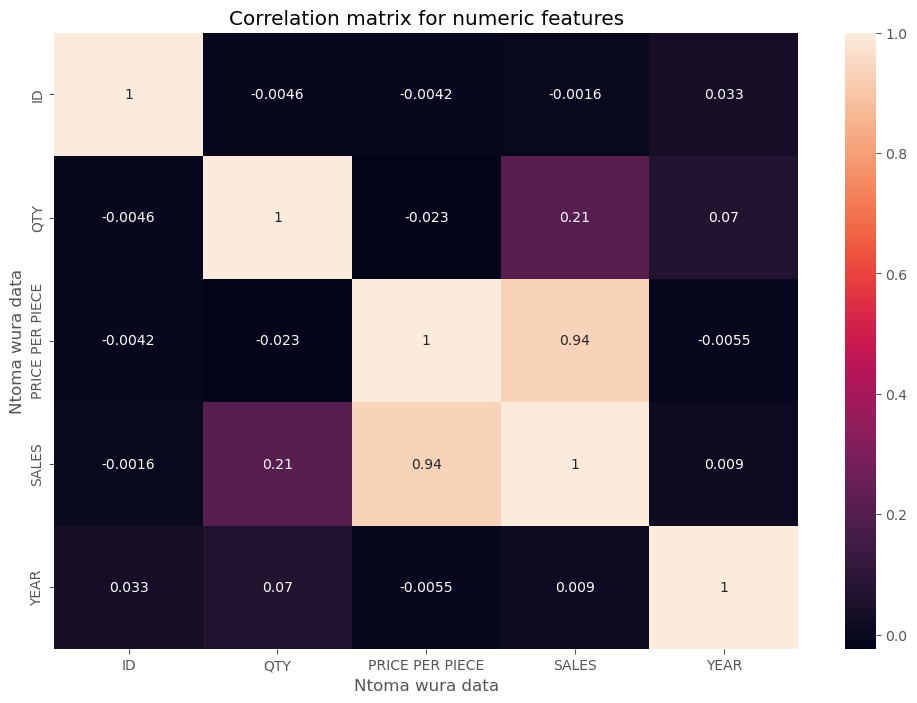

In [61]:
sns.heatmap(ntoma_wura_correlation, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Ntoma wura data')
plt.ylabel('Ntoma wura data')
plt.show

There is a positive and high correlation between price per piece and Sales.

In [62]:
#convert date to int
ntoma_wura['DATE'] = ntoma_wura['DATE'].astype('int64')

#### Convert data to numeric

In [63]:
ntoma_wura_numerics = ntoma_wura
for col_name in ntoma_wura_numerics.columns:
    if (ntoma_wura_numerics[col_name].dtype == 'object'):
        ntoma_wura_numerics[col_name]=ntoma_wura_numerics[col_name].astype('category')
        ntoma_wura_numerics[col_name]=ntoma_wura_numerics[col_name].cat.codes
    
ntoma_wura_numerics.head()

,ID,PRODUCT,QTY,PRICE PER PIECE,SALES,DATE,CITY,REG,MONTH,YEAR
0,1,6,30,200,6000,1582502400000000000,6,3,3,2020
1,2,6,34,200,6800,1588809600000000000,6,3,8,2020
2,3,6,41,200,8200,1593561600000000000,6,3,5,2020
3,4,6,45,200,9000,1598313600000000000,6,3,1,2020
4,5,6,49,200,9800,1602288000000000000,6,3,10,2020


##### correlation metrics

<function matplotlib.pyplot.show(close=None, block=None)>

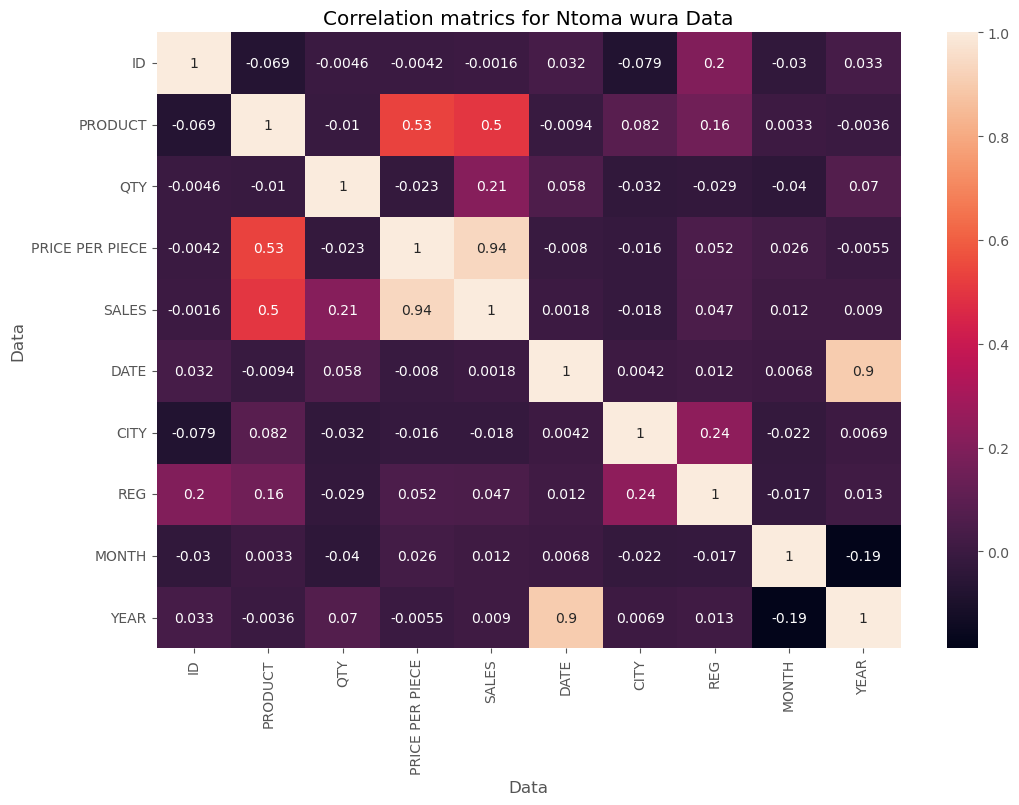

In [64]:
correlation_matrix = ntoma_wura_numerics.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrics for Ntoma wura Data')
plt.xlabel('Data')
plt.ylabel('Data')
plt.show

The correlation between products and sales and price per piece is a positve one which is above 50%

## Conclusion

Overall sales summary

- The total sales is 47,090,390
- The number of sales made was 2,823.
- The average sales was 16,681.
- The highest sales amount is 114,000.
- The lowest amount of sales is 1,100.

Year
- 2021 recorded the highest Total sales whiles 2022 recorded the lowest Total sales. This means sales is underperforming.
- 2020 had the highest sales activity however recorded the lowest sales amount as well as average figure.
- 2022 had the lowest sales actvities however recorded the highes sales amount and high average figure. 

Month
- Sales peakes in November whiles its performance reduced in July.
- November had the highest level of sales activities. June had the lowest activities.

Product

- Kentepa was the highest performer interms of sales.
- GTP Nustyle was the highest product sold.
- High target recorded the least sold amount.
- ATL was the least purchased sold.
- Kente pa had the highest average figure.

City

- Makola performed well amongst all the cities with 11,710,900. koforidua didn't perform well.
- Ejisu had the highest sales activities. Ho had the lowest sales activities.
- The highest sales amount was recorded in Goaso with 114,000. Tamale recorded the lowest sales amount with 1,100.
- On the average, Asikuma performed better than the rest of the cities with a sales figure of 27575.32.



Correlation

Quantity and Total amount.

- Majority of the quantity of products sold was between 20 to 55
- The more the quatity sold the higher the total sales.
- There is a corelation between total sales and the quantity purchased.

Price per piecr vs Quantity

- most of the product sold were below 600, and the number of products sold were between 20 to 50.
-There is a positive and high correlation between price per piece and Saleswhich is 94 %.
-The correlation between products and sales and price per piece is a positve one which is above 50%
- The correlation between quantity and sales is a linear correlation. Regression models can be built on them.